In [22]:
import collections

import supermarq
import cirq
import matplotlib.pyplot as plt

# Introduction

In [9]:
def noisy_simulation(circuit: cirq.Circuit, p: float) -> collections.Counter:
    """
    Simulate the given circuit under a depolarizing noise model where every
    gate operation has the chance of depolarizing the qubit with probability p.
    """
    
    shots = 1000
    result = cirq.Simulator().run(circuit.with_noise(cirq.depolarize(p=p)),
                                  repetitions=shots)

    num_measured_qubits = []
    for _, op in circuit.findall_operations(cirq.is_measurement):
        num_measured_qubits.append(len(op.qubits))
    raw_counts = result.multi_measurement_histogram(keys=result.measurements.keys())

    # cirq.Result.multi_measurement_histogram returns a collection.Counter object
    # where the keys are tuples of integers and the values are the shot counts.
    # The integers in the keys indicate the bitstring result of each set of measurement tags.
    counts: Dict[str, float] = collections.defaultdict(float)
    for key, val in raw_counts.items():
        bit_list = []
        for int_tag, num_bits in zip(key, num_measured_qubits):
            bit_list.extend(cirq.value.big_endian_int_to_bits(int_tag, bit_count=num_bits))
        counts["".join([str(b) for b in bit_list])] = val / shots

    return collections.Counter(counts)

# Benchmarks

## GHZ

In [10]:
# Create the benchmark object
num_qubits = 5
ghz = supermarq.ghz.GHZ(num_qubits)

In [11]:
# Generate the circuit
ghz_circuit = ghz.circuit()
print(ghz_circuit)

0: ───H───@───────────────M───
          │               │
1: ───────X───@───────────M───
              │           │
2: ───────────X───@───────M───
                  │       │
3: ───────────────X───@───M───
                      │   │
4: ───────────────────X───M───


In [16]:
# Noisy simulation
sim_results = []
for error_prob in [0.0, 0.005, 0.02]:
    sim_results.append((error_prob, noisy_simulation(ghz_circuit, p=error_prob)))

In [20]:
# Evaluate the benchmark score function
scores = []
for error_prob, counts in sim_results:
    scores.append((error_prob, ghz.score(counts)))

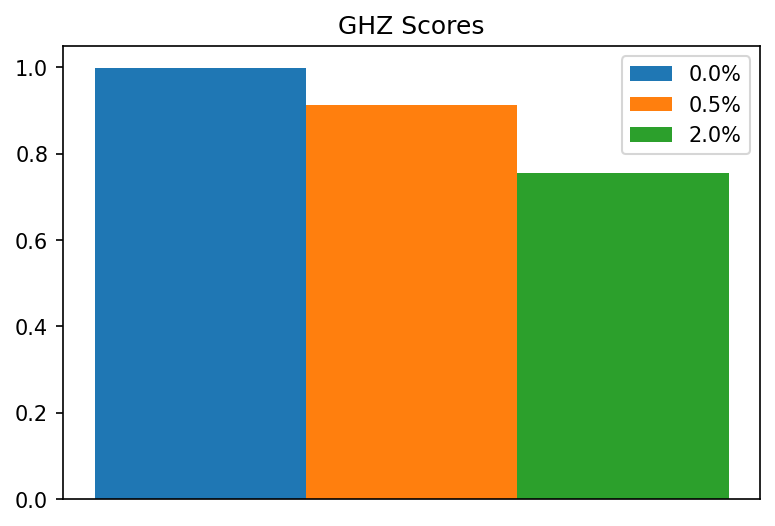

In [29]:
# Plot the results
fig, ax = plt.subplots(dpi=150)
width = 0.1

for i, (error_prob, score) in enumerate(scores):
    x = width * i
    ax.bar(x, score, width=width, label=f'{error_prob * 100:.1f}%', align='edge')

ax.legend()
ax.set_title('GHZ Scores')
ax.get_xaxis().set_visible(False)

## Mermin-Bell

In [32]:
# Create the benchmark object
num_qubits = 3
merminbell = supermarq.mermin_bell.MerminBell(num_qubits)

In [33]:
# Generate the circuit
mb_circuit = merminbell.circuit()
print(mb_circuit)

0: ───Rx(-0.5π)───@───────────@───────X───X───S───@───H───────M───
                  │           │       │   │       │           │
1: ───────────────X───@───H───┼───@───┼───@───────@───S───H───M───
                      │       │   │   │                       │
2: ───────────────────X───H───X───X───@───S───H───────────────M───


In [34]:
# Noisy simulation
sim_results = []
for error_prob in [0.0, 0.005, 0.02]:
    sim_results.append((error_prob, noisy_simulation(mb_circuit, p=error_prob)))

In [35]:
# Evaluate the benchmark score function
scores = []
for error_prob, counts in sim_results:
    scores.append((error_prob, merminbell.score(counts)))

<mermin_op> = 4.0
<mermin_op> = 3.284
<mermin_op> = 1.9840000000000004


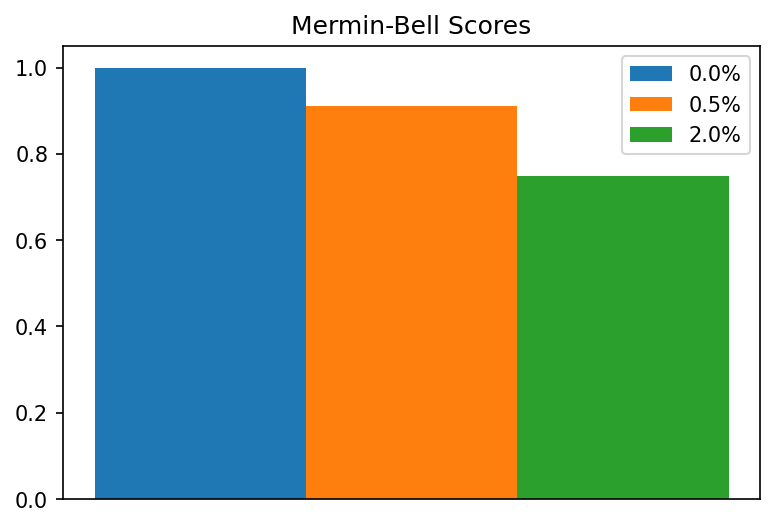

In [36]:
# Plot the results
fig, ax = plt.subplots(dpi=150)
width = 0.1

for i, (error_prob, score) in enumerate(scores):
    x = width * i
    ax.bar(x, score, width=width, label=f'{error_prob * 100:.1f}%', align='edge')

ax.legend()
ax.set_title('Mermin-Bell Scores')
ax.get_xaxis().set_visible(False)

## Bit Code

## Phase Code

## VQE

## Hamiltonian Simulation

## Fermionic-SWAP QAOA

## Vanilla QAOA